In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images= train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images= test_images.reshape(test_images.shape[0], 32, 32, 3)

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
index2,_ = np.where(train_labels>4)
index1,_ = np.where(train_labels<5)

index_t2,_ = np.where(test_labels>4)
index_t1,_ = np.where(test_labels<5)

train_images1 = train_images[index1]
train_images2 = train_images[index2]
test_images1 = test_images[index_t1]
test_images2 = test_images[index_t2]

train_labels1 = train_labels[index1]
train_labels2 = train_labels[index2]
test_labels1 = test_labels[index_t1]
test_labels2 = test_labels[index_t2]

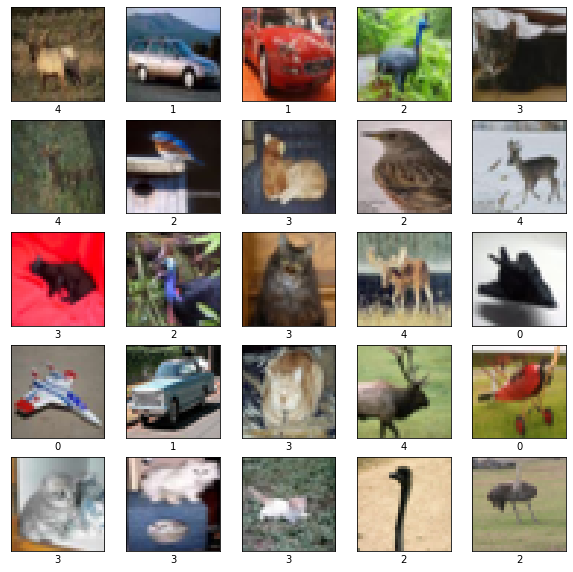

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images1[i])
    plt.xlabel(train_labels1[i][0])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(95, activation='relu'))
model.add(layers.Dense(5))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 95)                291935    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 480       
Total params: 292,415
Trainable params: 292,415
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images1, train_labels1, batch_size=64, epochs=10, validation_data=(test_images1, test_labels1))

Epoch 1/10
391/391 [==============================] - 1s 4ms/step - loss: 1.3122 - accuracy: 0.4683 - val_loss: 1.2657 - val_accuracy: 0.4912
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 1.1769 - accuracy: 0.5292 - val_loss: 1.1745 - val_accuracy: 0.5324
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 1.1447 - accuracy: 0.5430 - val_loss: 1.1539 - val_accuracy: 0.5328
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 1.1171 - accuracy: 0.5547 - val_loss: 1.1132 - val_accuracy: 0.5556
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 1.0758 - accuracy: 0.5722 - val_loss: 1.0932 - val_accuracy: 0.5644
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 1.0637 - accuracy: 0.5764 - val_loss: 1.0593 - val_accuracy: 0.5830
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 1.0431 - accuracy: 0.5870 - val_loss: 1.0516 - val_accuracy: 0.5806
Epoch 

157/157 - 0s - loss: 1.0259 - accuracy: 0.5882
test accuracy: 0.5882


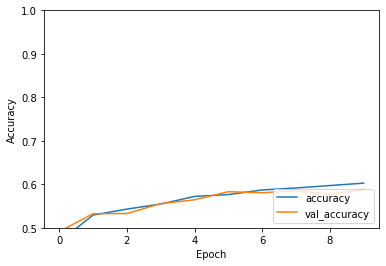

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images1,  test_labels1, verbose=2)


print("test accuracy: {:.4f}".format(test_acc))